# 数组操作
## 更改形状

在对数组进行操作时，为了满足格式和计算的要求通常会改变其形状
- `numpy.ndarray.shape`表示数组的维度，返回一个元组，这个元组的长度就是维度的数目，即`ndim`属性（秩）
【例】通过修改shape属性来改变数组的形状


In [1]:
import numpy as np

x = np.array([1 ,2 ,3 ,4 ,5 ,6 ,7, 8])
print(x.shape) # (8,)
x.shape = [2, 4]
print(x)
# [[1 2 3 4]
#  [5 6 7 8]]

(8,)
[[1 2 3 4]
 [5 6 7 8]]


- `numpy.ndarray.flat`将数组转换为一维的迭代器，可以用for访问数组每一个元素

In [5]:
x = np.arange(25).reshape(5, 5)
y = x.flat
print(y)
for i in y:
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

- `numpy.ndarray.flatten([order='C'])`将原数组的副本转换为一维数组，并返回
 - `order`:'C'按行,'F'按列,'A'原顺序,'k'元素再内存中出现顺序
 - `order`：{'C / F，'A，K}，可选使用此索引顺序读取a的元素。'C'意味着以行大的C风格顺序对元素进行索引，最后一个轴索引会更改F表示以列大的Fortran样式顺序索引元素，其中第一个索引变化最快，最后一个索引变化最快。请注意，'C'和'F'选项不考虑基础数组的内存布局，仅引用轴索引的顺序.A'表示如果a为Fortran，则以类似Fortran的索引顺序读取元素在内存中连续，否则类似C的顺序。“ K”表示按照步序在内存中的顺序读取元素，但步幅为负时反转数据除外。默认情况下，使用Cindex顺序。
 
【例】`flatten()`函数返回的是拷贝

In [6]:
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20]])
y = x.flatten()
print(y) # [11 12 13 14 15 16 17 18 19 20]

y[3] = 0
print(x)
# [[11 12 13 14 15]
#  [16 17 18 19 20]] 没变，因为是copy

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20]])
y = x.flatten(order = 'F')
print(y)
# [11 16 12 17 13 18 14 19 15 20]

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20]])
y = x.flatten(order = 'k')
print(y)
# [11 12 13 14 15 16 17 18 19 20]

[11 12 13 14 15 16 17 18 19 20]
[[11 12 13 14 15]
 [16 17 18 19 20]]
[11 16 12 17 13 18 14 19 15 20]
[11 12 13 14 15 16 17 18 19 20]


- `ravel()`返回的是视图

In [1]:
import numpy as np

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.ravel(x)
print(y)
# [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
#  35]

y[3] = 0
print(x)
# [[11 12 13  0 15]
#  [16 17 18 19 20]
#  [21 22 23 24 25]
#  [26 27 28 29 30]
#  [31 32 33 34 35]]

[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35]
[[11 12 13  0 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]


`order = F`就是按列

In [5]:
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.ravel(x, order = 'F')
print(y)

y[3] = 0
print(x)

[11 16 21 26 31 12 17 22 27 32 13 18 23 28 33 14 19 24 29 34 15 20 25 30
 35]
[[11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]


- `numpy.reshape(a, nweshape[, order = 'C'])`在不更改数据的情况下为数组赋予新的形状

返回的是原数组的副本，改变reshape后的数组，原数组也会改变

【例】`reshape()`函数当参数`newshape = [rows, -1]`时，将根据行数自动确定列数

In [7]:
x = np.arange(12)
y = np.reshape(x, [3, 4])
print(y, y.dtype)
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]] int64

y = np.reshape(x, [4, -1])
print(y)
# [[ 0  1  2]
#  [ 3  4  5]
#  [ 6  7  8]
#  [ 9 10 11]]

y = np.reshape(x, [-1, 6])
print(y)
# [[ 0  1  2  3  4  5]
#  [ 6  7  8  9 10 11]]

y[0, 1] = 10
print(x)
# [ 0 10  2  3  4  5  6  7  8  9 10 11]#原数组发生改变

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] int64
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[ 0 10  2  3  4  5  6  7  8  9 10 11]


【例】`reshape()`函数当参数`newshape = -1`时，表示将数组降为一维

In [9]:
x = np.random.randint(0, 10, (2, 3, 4))
print(x)
# [[[0 1 3 9]
#   [3 8 5 4]
#   [8 4 9 8]]

#  [[3 1 8 0]
#   [4 6 5 4]
#   [8 9 8 9]]]
y = np.reshape(x, -1, order = 'F')
print(y)
# [0 3 3 4 8 8 1 1 8 6 4 9 3 8 5 5 9 8 9 0 4 4 8 9]

[[[0 1 3 9]
  [3 8 5 4]
  [8 4 9 8]]

 [[3 1 8 0]
  [4 6 5 4]
  [8 9 8 9]]]
[0 3 3 4 8 8 1 1 8 6 4 9 3 8 5 5 9 8 9 0 4 4 8 9]


## 数组转置
- `numpy.transpose(a, axes = None)` 转置数组
- `numpy.ndarray.T`  但如果self.ndim<2，则返回self。

In [20]:
x = np.around(np.random.rand(3, 3) * 10, 2)
print(x)
# [[1.8  7.03 0.22]
#  [7.19 4.04 0.62]
#  [4.84 5.43 6.  ]]

y = x.T
print(y)
# [[1.8  7.19 4.84]
#  [7.03 4.04 5.43]
#  [0.22 0.62 6.  ]]

y = np.transpose(x)
print(y)
# [[1.8  7.19 4.84]
#  [7.03 4.04 5.43]
#  [0.22 0.62 6.  ]]

[[1.8  7.03 0.22]
 [7.19 4.04 0.62]
 [4.84 5.43 6.  ]]
[[1.8  7.19 4.84]
 [7.03 4.04 5.43]
 [0.22 0.62 6.  ]]
[[1.8  7.19 4.84]
 [7.03 4.04 5.43]
 [0.22 0.62 6.  ]]


## 更改维度
当创建一个数组之后，还可以给它增加一个维度，这在矩阵计算中经常会用到

- `numpy.newaxis = None` None的别名，对索引数组很有用

【例】很多工具包在进行计算时都会先判断输入数据的维度是否满足要求，如果输入数据达不到指定的维度，可以使用`newaxis`参数来增加一个维度

In [21]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x[np.newaxis, :]
print(y.shape) # (1, 8)
print(y) # [[1 2 3 4 5 6 7 8]]

y = x[:, np.newaxis] 
print(y.shape) # (8, 1)
print(y)
# [[1]
#  [2]
#  [3]
#  [4]
#  [5]
#  [6]
#  [7]
#  [8]]

(1, 8)
[[1 2 3 4 5 6 7 8]]
(8, 1)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]


- `numpy.squeeze(a, axis = None)`从数组的形状中删除单维度条目，即把shape中为1的维度去掉
 - a表示输入的数组
 - axis用于指定需要删除的维度，但是指定的维度必须为但唯独，否则报错
 
在机器学习和深度学习中，通常算法的结果是可以表示向量的数组（即包含两对或以上的方括号形式[[]])，如果直接利用这个数组进行画图可能显示界面为空（见后面的示例）。我们可以利用`squeeze()`函数将表示向量的数组转换为秩为1（即一维数组）的数组，这样利用matplotlib库函数画图时，就可以正常的显示结果了

In [24]:
x = np.arange(10)
y = x[np.newaxis, :]
print(y) # [[0 1 2 3 4 5 6 7 8 9]]
z = np.squeeze(x)
print(z.shape, z, sep = '\n')
# (10,)
# [0 1 2 3 4 5 6 7 8 9]

[[0 1 2 3 4 5 6 7 8 9]]
(10,)
[0 1 2 3 4 5 6 7 8 9]


In [30]:
x = np.random.randint(1, 10, (1, 3, 1))
print(x)
# [[[1]
#   [4]
#   [4]]]
y = np.squeeze(x)
print(y.shape, y, sep = '\n')
# (3,)
# [1 4 4]

y = np.squeeze(x, axis = 0)
print(y.shape, y, sep = '\n')
# (3, 1)
# [[1]
#  [4]
#  [4]]

y = np.squeeze(x, axis=2)
print(y.shape, y, sep = '\n')
# (1, 3)
# [[1 4 4]]

y = np.squeeze(x, axis=1)
# ValueError: cannot select an axis to squeeze out which has size not equal to one

[[[1]
  [4]
  [4]]]
(3,)
[1 4 4]
(3, 1)
[[1]
 [4]
 [4]]
(1, 3)
[[1 4 4]]


ValueError: cannot select an axis to squeeze out which has size not equal to one

(1, 5)


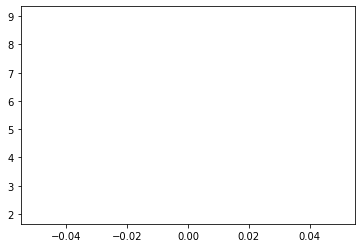

In [32]:
import matplotlib.pyplot as plt
x = np.random.randint(1, 10, (1, 5))
print(x.shape)
plt.plot(x)
plt.show()

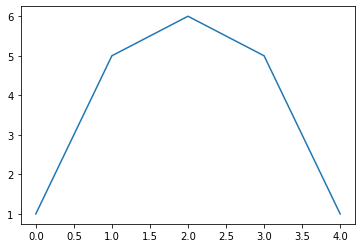

In [33]:
x = np.random.randint(1, 10, (1, 5))
y = np.squeeze(x)
plt.plot(y)
plt.show()

## 数组组合
如果要将两份数据组合到一起，就需要拼接操作
- `numpy.concatenate((a1, a2, ...), axis = 0, out = None)` 沿现有的轴连接两个数组序列（原来x，y都是一维的，拼接后的结果也是一维的）

In [24]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
z = np.concatenate([x, y])
print(z) # [1 2 3 4 5 6]

z = np.concatenate([x, y], axis = 0)
print(z) # [1 2 3 4 5 6]

[1 2 3 4 5 6]
[1 2 3 4 5 6]


原来x，y都是二维的，拼接后的结果也是二维的

In [4]:
x = np.arange(12).reshape(3, 4)
y = np.arange(12).reshape(3, 4)
z = np.concatenate([x, y])
print(z)
print(np.concatenate([x, y], axis = 1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3  0  1  2  3]
 [ 4  5  6  7  4  5  6  7]
 [ 8  9 10 11  8  9 10 11]]


- `numpy.stack(arrays, axis = 0, out = None)`沿着新的轴加入一些列数组（stack为增加维度的拼接）

In [9]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
print(np.stack([x, y], axis = 0))
# [[1 2 3]
#  [4 5 6]]

print(np.stack([x, y], axis = 1))
# [[1 4]
#  [2 5]
#  [3 6]]

x = np.arange(6).reshape(2, 3)
y = np.arange(6).reshape(2, 3)
print(x)
# [[0 1 2]
#  [3 4 5]]
print(np.stack([x, y], axis = 2))
# [[[0 0]
#   [1 1]
#   [2 2]]

#  [[3 3]
#   [4 4]
#   [5 5]]]

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]
[[0 1 2]
 [3 4 5]]
[[[0 0]
  [1 1]
  [2 2]]

 [[3 3]
  [4 4]
  [5 5]]]


- `numpy.vstack(tup)`vertically (row wise).
- `numpy.hstack(tup)`horizontally (column wise).

一维情况

In [12]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
print(np.vstack([x, y]))
print(np.stack([x, y]))
# [[1 2 3]
#  [4 5 6]]

print(np.hstack([x, y]))
print(np.concatenate([x, y]))
# [1 2 3 4 5 6]

[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]
[1 2 3 4 5 6]


二维情况

In [25]:
x = np.arange(3).reshape(1, 3)
y = x.copy()
print(np.vstack([x, y]))
print(np.concatenate([x, y]))
# [[0 1 2]
#  [0 1 2]]

print(np.hstack([x, y]))
print(np.concatenate([x, y], axis = 1))
# [[0 1 2 0 1 2]]

[[0 1 2]]
[[0 1 2]
 [0 1 2]]
[[0 1 2]
 [0 1 2]]
[[0 1 2 0 1 2]]
[[0 1 2 0 1 2]]


`hstack(),vstack()`分别表示水平和竖直的拼接方式。在数据维度等于1时，比较特殊。而当维度大于或等于2时，它们的作用相当于`concatenate`，用于在已有轴上进行操作。

In [26]:
a = np.hstack([np.array([1, 2, 3, 4]), 5])
print(a)  # [1 2 3 4 5]

a = np.concatenate([np.array([1, 2, 3, 4]), 5])
print(a)
# all the input arrays must have same number of dimensions, 
# but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

[1 2 3 4 5]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

## 数组拆分
- `numpy.split(ary, indices_or_sections, axis = 0)`拆分数组

In [32]:
x = np.array([[11, 12, 13, 14],
              [16, 17, 18, 19],
              [21, 22, 23, 24]])
y = np.split(x, [1, 3]) # 拆成0-1 1-2两个部分
print(y)
# [array([[11, 12, 13, 14]]), array([[16, 17, 18, 19],
#        [21, 22, 23, 24]]), array([], shape=(0, 4), dtype=int64)]

print(np.split(x, [0, 1, 3], axis = 1))
# [array([], shape=(3, 0), dtype=int64), array([[11],
#        [16],
#        [21]]), array([[12, 13],
#        [17, 18],
#        [22, 23]]), array([[14],
#        [19],
#        [24]])]

[array([[11, 12, 13, 14]]), array([[16, 17, 18, 19],
       [21, 22, 23, 24]]), array([], shape=(0, 4), dtype=int64)]
[array([], shape=(3, 0), dtype=int64), array([[11],
       [16],
       [21]]), array([[12, 13],
       [17, 18],
       [22, 23]]), array([[14],
       [19],
       [24]])]


- `numpy.vsplit(ary, indices_or_sections)`把数组按照高度切分

In [34]:
x = np.array([[11, 12, 13, 14],
              [16, 17, 18, 19],
              [21, 22, 23, 24]])
print(x.shape, np.vsplit(x, 3))
# (3, 4) [array([[11, 12, 13, 14]]), array([[16, 17, 18, 19]]), array([[21, 22, 23, 24]])]

y = np.vsplit(x, [1, 3])
print(y)
# [array([[11, 12, 13, 14]]), array([[16, 17, 18, 19],
#        [21, 22, 23, 24]]), array([], shape=(0, 4), dtype=int32)]

y = np.split(x, [1, 3], axis=0)
print(y)
# [array([[11, 12, 13, 14]]), array([[16, 17, 18, 19],
#        [21, 22, 23, 24]]), array([], shape=(0, 4), dtype=int32)]

(3, 4) [array([[11, 12, 13, 14]]), array([[16, 17, 18, 19]]), array([[21, 22, 23, 24]])]


- `numpy.hsplit(ary, indices_or_sections)`将数组按照宽度切分

In [36]:
x = np.array([[11, 12, 13, 14],
              [16, 17, 18, 19],
              [21, 22, 23, 24]])
print(np.hsplit(x, 2))
# [array([[11, 12],
#        [16, 17],
#        [21, 22]]), array([[13, 14],
#        [18, 19],
#        [23, 24]])]
y = np.hsplit(x, [1, 3])
print(y)
# [array([[11],
#        [16],
#        [21]]), array([[12, 13],
#        [17, 18],
#        [22, 23]]), array([[14],
#        [19],
#        [24]])]

y = np.split(x, [1, 3], axis=1)
print(y)
# [array([[11],
#        [16],
#        [21]]), array([[12, 13],
#        [17, 18],
#        [22, 23]]), array([[14],
#        [19],
#        [24]])]

[array([[11, 12],
       [16, 17],
       [21, 22]]), array([[13, 14],
       [18, 19],
       [23, 24]])]


## 数组平铺
- `numpy.tile(A, reps) tile`是瓷砖的意思，顾名思义，这个函数就是把数组像瓷砖一样铺展开来

【例】将原矩阵横向、纵向地复制

In [3]:
import numpy as np
x = np.array([[1, 2], [3, 4]])
print(x)
# [[1 2]
#  [3 4]]

print(np.tile(x, (1, 3))) # 横向铺展一次，纵向铺展三次
# [[1 2 1 2 1 2]
#  [3 4 3 4 3 4]]

[[1 2]
 [3 4]]
[[1 2 1 2 1 2]
 [3 4 3 4 3 4]]


- `numpy.repeat(a, repeats, axis = None)` 重复矩阵的元素
 - repeats 可以为一个数，也可以为一个矩阵
 - axis = None时就会flatten当前矩阵，实际上就是变成了一个行向量

In [ ]:
x = np.repeat(3, 4)
print(x)  # [3 3 3 3]

x = np.array([[1, 2], [3, 4]])
y = np.repeat(x, 2)
print(y)
# [1 1 2 2 3 3 4 4]

y = np.repeat(x, 2, axis=0)
print(y)
# [[1 2]
#  [1 2]
#  [3 4]
#  [3 4]]

y = np.repeat(x, 2, axis=1)
print(y)
# [[1 1 2 2]
#  [3 3 4 4]]

y = np.repeat(x, [2, 3], axis=0)
print(y)
# [[1 2]
#  [1 2]
#  [3 4]
#  [3 4]
#  [3 4]]

y = np.repeat(x, [2, 3], axis=1)
print(y)
# [[1 1 2 2 2]
#  [3 3 4 4 4]]

## 添加和删除元素
- `numpy.unique(ar, return_index=False, return_inverse=False,return_counts=False, axis=None)` Find the unique elements of an array.
 - `return_index`：the indices of the input array that give the unique values位置的索引
 - `return_inverse`：the indices of the unique array that reconstruct the input array原数组中的元素在唯一值数组中的下标
 - `return_counts`：the number of times each unique value comes up in the input array不同元素出现的次数
 
【例】查找数组的唯一元素

In [56]:
a = np.array([1, 1, 3, 3, 4, 5, 6, 4])
b = np.unique(a, return_counts = True, return_index = True, return_inverse = True)
print(b)
# (array([1, 3, 4, 5, 6]), array([0, 2, 4, 5, 6]), array([0, 0, 1, 1, 2, 3, 4, 2]), array([2, 2, 2, 1, 1]))

lst = [i for i in range(list(b[3]).index(1), len(b[3]))]
print(b[0][lst])


(array([1, 3, 4, 5, 6]), array([0, 2, 4, 5, 6]), array([0, 0, 1, 1, 2, 3, 4, 2]), array([2, 2, 2, 1, 1]))
[5 6]


## 练习
- 1.将arr的二维数组按列输出

In [57]:
arr = np.array([[16, 17, 18, 19, 20],[11, 12, 13, 14, 15],
                [21, 22, 23, 24, 25],[31, 32, 33, 34, 35],[26, 27, 28, 29, 30]])
print(arr.flatten(order = 'F'))
# [16 11 21 31 26 17 12 22 32 27 18 13 23 33 28 19 14 24 34 29 20 15 25 35
#  30]

[16 11 21 31 26 17 12 22 32 27 18 13 23 33 28 19 14 24 34 29 20 15 25 35
 30]


- 2.给定两个随机数组A和B，验证它们是否相等
- `numpy.allclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)`判断两个向量是否相近
- `np.array_equal(A, B)`完全相同

In [75]:
a = np.array([1, 2, 3])
b = a.copy()
print(np.allclose(a, b), np.array_equal(a, b)) # True True

c = np.random.rand(10)
d = np.random.rand(10)
print(c, d, sep = '\n\n')
print(np.allclose(c, d), np.array_equal(c, d)) # False False

True True
[0.14821794 0.5032764  0.53075133 0.36721384 0.55032568 0.85099876
 0.63886239 0.42699376 0.43136818 0.85720185]

[0.4563625  0.41251255 0.28584412 0.71800457 0.55231578 0.94844955
 0.99377274 0.03347476 0.74461671 0.18650151]
False False


- 3.在给定的numpy数组中找到重复的条目（第二次出现以后），并将它们标记为True。第一次出现应为False

In [78]:
np.random.seed(100)
a = np.random.randint(0, 5, 10)
print(a)

ans = np.full(10, True)
vals, counts = np.unique(a, return_index = True)
ans[counts] = False
print(ans)

[0 0 3 0 2 4 2 2 2 2]
[False  True False  True False False  True  True  True  True]
